**OASIS INFOBYTE**

**DATA SCIENCE INTERNSHIP TASK 03:**

**CAR PRICE PREDICTION USING MACHINE LEARNING**

**MEMBER: SWEETHA . A**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


In [ ]:
#loading the dataset
data=pd.read_csv("/content/car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
print(f'No of rows in the dataset:',data.shape[0])
print(f'No of columns in the dataset:',data.shape[1])


No of rows in the dataset: 301
No of columns in the dataset: 9


In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
#descriptive statistics
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
#checking for null values
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
null_values=data.isnull().sum().sum()
print(f'No of null values in the dataset:',null_values)

No of null values in the dataset: 0


In [ ]:
#dropping duplicate rows
data2=data.drop_duplicates()
data2

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# Splitting features and target variable
X = data2.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data2['Selling_Price']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on test data
y_pred_lr = lr.predict(X_test)
pd.DataFrame(y_pred_lr)

,0
0,2.954337
1,8.177163
2,6.456123
3,-1.423372
4,9.088647
...,...
56,4.474690
57,8.972559
58,1.829489
59,7.603768


In [ ]:
# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R2: {r2_lr}')

Linear Regression MSE: 3.4813498305146187
Linear Regression R2: 0.8488707839191938


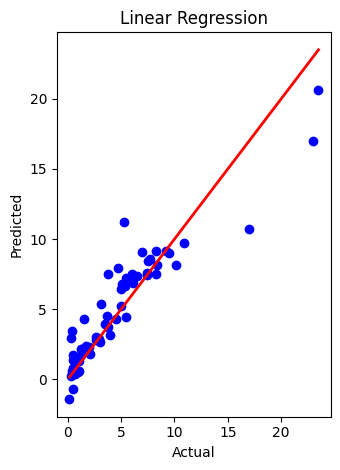

In [ ]:
# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
# Train Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on test data
y_pred_rf = rf.predict(X_test)
pd.DataFrame(y_pred_rf)

,0
0,0.4441
1,10.9272
2,4.9030
3,0.2023
4,7.5490
...,...
56,5.1435
57,9.3753
58,2.6724
59,6.7225


In [ ]:
# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2: {r2_rf}')

Random Forest MSE: 0.8209857844262285
Random Forest R2: 0.9643601062650229


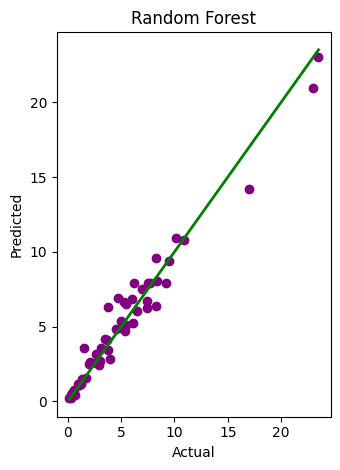

In [ ]:
# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=2)
plt.title('Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()